<a href="https://colab.research.google.com/github/PrimeshShamilka/FabricDefectDetector/blob/master/FabricDefectClassifier_V0_1_0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [45]:
import tensorflow as tf
import pathlib
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
from PIL import Image # used for loading images
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D


tf.__version__


'2.2.0-rc2'

In [9]:
# Upload Image dataset from google drive

# Mount google drive
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [37]:
# Read data into train_dataset and test_dataset

train_path = '/content/drive/My Drive/Colab Notebooks/Dataset1/Train'
test_path = '/content/drive/My Drive/Colab Notebooks/Dataset1/Test'

train_path = pathlib.Path(train_path)
test_path = pathlib.Path(test_path)

# Get the image count
image_count = len(list(train_path.glob('*/*.jpg')))
print(image_count)

# Store class names in CLASS_NAMES
CLASS_NAMES = np.array([item.name for item in train_path.glob('*') if item.name != "LICENSE.txt"])
print(CLASS_NAMES)

# Use the Image Data Generator to retreive images
image_generator = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255) #rescaling factor. Defaults to None. If None or 0, no rescaling is applied, otherwise we multiply the data by the value provided (after applying all other transformations).

# Parameters for the loader
BATCH_SIZE = 50
IMG_HEIGHT = 512
IMG_WIDTH = 768
STEPS_PER_EPOCH = np.ceil(image_count/BATCH_SIZE)

train_dataset = image_generator.flow_from_directory(directory=str(train_path),
                                                     batch_size=BATCH_SIZE,
                                                     shuffle=True,
                                                     target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                     class_mode='binary')

test_dataset = image_generator.flow_from_directory(directory=str(test_path),
                                                     batch_size=BATCH_SIZE,
                                                     shuffle=True,
                                                     target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                     class_mode='binary')


0
['Defect' 'noDefect']
Found 171 images belonging to 2 classes.
Found 32 images belonging to 2 classes.


(32, 512, 768, 3) (32, 2)


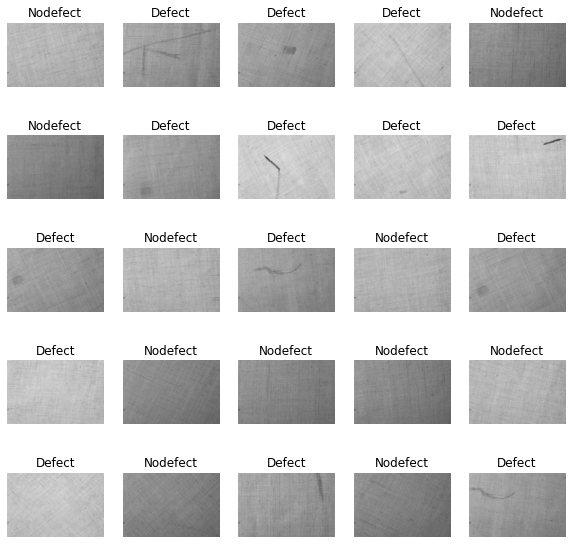

In [36]:
# Inpect a batch
def show_batch(image_batch, label_batch):
  plt.figure(figsize=(10,10))
  for n in range(25):
      ax = plt.subplot(5,5,n+1)
      plt.imshow(image_batch[n])
      plt.title(CLASS_NAMES[label_batch[n]==1][0].title())
      plt.axis('off')

image_batch, label_batch = next(test_dataset)
show_batch(image_batch, label_batch)
print (image_batch.shape,label_batch.shape)
# Positive -- Stain
# Negative -- No-Stain

In [50]:
# CNN

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_WIDTH, IMG_HEIGHT, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(2))

model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 766, 510, 32)      896       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 383, 255, 32)      0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 381, 253, 64)      18496     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 190, 126, 64)      0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 188, 124, 64)      36928     
_________________________________________________________________
flatten_4 (Flatten)          (None, 1491968)           0         
_________________________________________________________________
dense_8 (Dense)              (None, 64)               

In [0]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# removing one hot encoding of label_batch
# print (type(image_batch))

In [52]:
# for i in range(len(train_data_gen)):
#   image_batch, label_batch = next(train_data_gen)
# label_batch = np.argmax(label_batch, axis=1)

history = model.fit_generator(
    train_dataset,
    steps_per_epoch=BATCH_SIZE, # batch_size,
    epochs=10,
    validation_data=test_dataset,
    validation_steps=BATCH_SIZE # batch_size
)

# history = model.fit(image_batch, label_batch, epochs=10)

Epoch 1/10
50/50 [==============================] - 33s 664ms/step - loss: 2.7671 - accuracy: 0.5316 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 2/10
50/50 [==============================] - 33s 655ms/step - loss: 0.6955 - accuracy: 0.5214 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 3/10
50/50 [==============================] - 32s 649ms/step - loss: 0.6928 - accuracy: 0.5116 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 4/10
50/50 [==============================] - 33s 662ms/step - loss: 0.6929 - accuracy: 0.5059 - val_loss: 0.6933 - val_accuracy: 0.5000
Epoch 5/10
50/50 [==============================] - 34s 678ms/step - loss: 0.6931 - accuracy: 0.5065 - val_loss: 0.6933 - val_accuracy: 0.5000
Epoch 6/10
50/50 [==============================] - 34s 687ms/step - loss: 0.6931 - accuracy: 0.5111 - val_loss: 0.6933 - val_accuracy: 0.5000
Epoch 7/10
50/50 [==============================] - 34s 684ms/step - loss: 0.6930 - accuracy: 0.5088 - val_loss: 0.6933 - val_accuracy: 0.5000

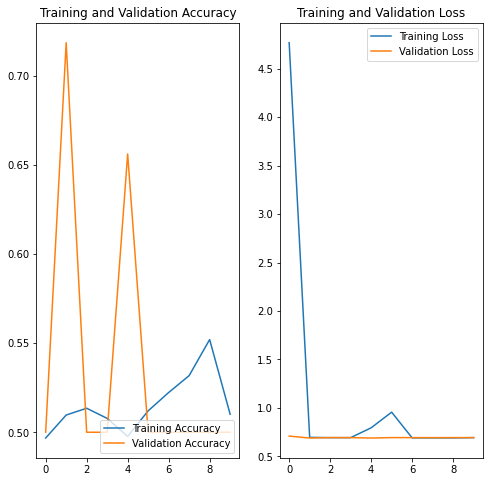

In [41]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss=history.history['loss']
val_loss=history.history['val_loss']

epochs_range = range(10)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()